In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [3]:
# Load the Iris dataset
iris = load_iris()

# Features as a DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Target as a Series
y = pd.Series(iris.target, name='species')

# Quickly inspect the first few rows
print(X.head())
print("\nSpecies distribution:\n", y.value_counts())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Species distribution:
 species
0    50
1    50
2    50
Name: count, dtype: int64


In [4]:
# Check for missing values in the feature set
print("Missing values per column:\n", X.isnull().sum())


Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Quick sanity check on sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set:     {X_test.shape[0]} samples")


Training set: 120 samples
Test set:     30 samples


In [6]:
# 1. Instantiate the classifier
clf = DecisionTreeClassifier(random_state=42)

# 2. Train the model
clf.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [7]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate metrics
acc  = accuracy_score(y_test,  y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec  = recall_score(y_test,    y_pred, average='macro')

# Print results
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}\n")

# Detailed classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Accuracy:  0.93
Precision: 0.93
Recall:    0.93

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



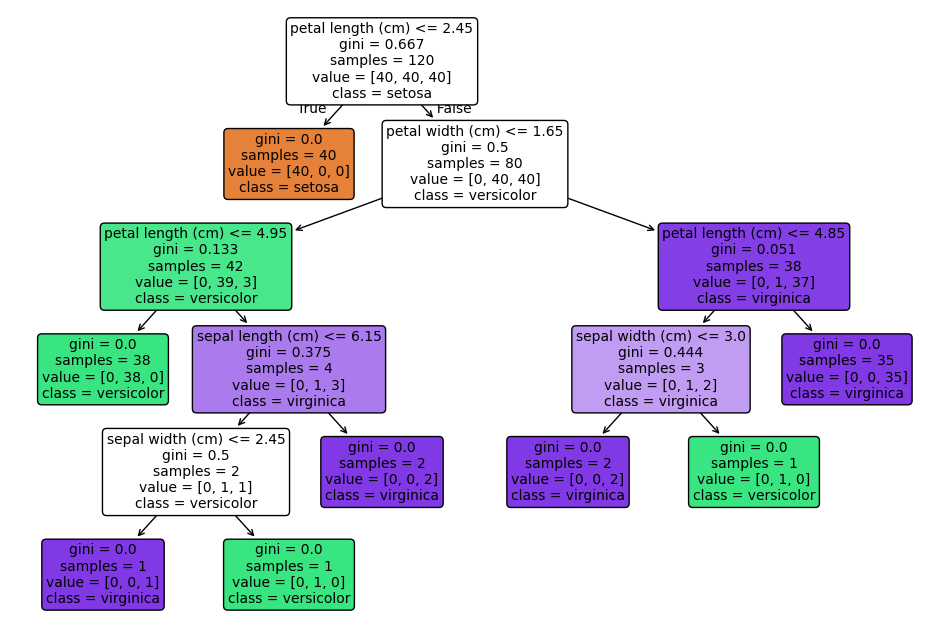

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the trained tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
